In [2]:
import numpy as np
import plotly.graph_objects as go

# Seminar VecAlg

Прежде чем мы начнем выполнять задачи векторной алгебры, отметим, что их очень полезно визуализировать, для чего ниже написана соответствующая функция. Почитайте ее описание (Docstring). В процессе выполнения заданий, вы можете визуализировать вектора, которые представлены в двумерном или трехмерном пространстве.

In [6]:
# @title Function `plot_vectors(vectors: np.ndarray, colors=None, labels=None)`
def plot_vectors(vectors: np.ndarray, colors:list=None, labels:list=None)->None:
    """
    Plots 3D vectors using Plotly.

    This function visualizes 3D vectors in a 3D space by plotting them as lines with arrows
    at their endpoints. Each vector can have a different color and an optional label for
    identification.

    Parameters:
    -----------
    vectors : np.ndarray
        A 2D numpy array of shape (n, 2) or (n, 3) representing the vectors to be plotted.
        Each row corresponds to a vector, where the first two columns represent the x and y
        coordinates, and the third column (if present) represents the z coordinate.

    colors : list of str, optional
        A list of color specifications for each vector. The default is red for all vectors
        if no colors are provided.

    labels : list of str, optional
        A list of labels for each vector. These labels will be displayed next to the corresponding
        vector in the plot. If no labels are provided, no text will be shown.

    Returns:
    --------
    None
        Displays a 3D plot of the vectors using Plotly.
    """
    fig = go.Figure()
    origin = [0, 0, 0]

    if vectors.shape[1] == 2:
        vectors = np.concatenate([vectors, np.zeros((vectors.shape[0], 1))], axis=1)

    vectors = vectors.tolist()

    if colors is None:
        colors = ['red'] * len(vectors)

    for i, vector in enumerate(vectors):
        color = colors[i]
        fig.add_trace(go.Scatter3d(x=[origin[0], vector[0]],
                                     y=[origin[1], vector[1]],
                                     z=[origin[2], vector[2]],
                                     mode='lines',
                                     line=dict(color=color, width=5)))

        fig.add_trace(go.Cone(x=[vector[0]], y=[vector[1]], z=[vector[2]],
                              u=[vector[0]], v=[vector[1]], w=[vector[2]],
                              showscale=False,
                              colorscale=[[0, color], [1, color]],
                              sizemode="absolute",
                              sizeref=0.5))


        if labels is not None and i < len(labels):
            fig.add_trace(go.Scatter3d(
                x=[vector[0]], y=[vector[1]], z=[vector[2]],
                mode='text',
                text=[labels[i]],
                textposition='top center',
                showlegend=False
            ))

    title = '3D Векторы'
    fig.update_layout(title=title, scene=dict(xaxis_title='X Axis',
                                               yaxis_title='Y Axis',
                                               zaxis_title='Z Axis'))
    fig.show()

In [21]:
plot_vectors # обращение к функции "без вызова" выводит ее описание!

<function __main__.plot_vectors(vectors: numpy.ndarray, colors: list = None, labels: list = None) -> None>

Ниже пример использования данной функции, где каждому вектору из массива можно поставить в соответствие цвет и лэйбл.

In [18]:
vectors = np.array([[1, 2, 1],
                    [3, 1, 4],
                    [2, 3, -1]])
colors = ['red', 'blue', 'green']
labels = ['Vector 1', 'Vector 2', 'Vector 3']

plot_vectors(vectors, colors=colors, labels=labels)

# Task_1

Расчитайте модуль каждого вектора и найдите их сумму.

In [11]:
a = np.array([ 2,  1, -5,  4,  3])
b = np.array([ 1, -3,  1, -1, -1])

In [12]:
mod_a = np.linalg.norm(a)
mod_b = np.linalg.norm(b)

sum_mod = mod_a + mod_b

print(f"Модуль вектора a: {mod_a}")
print(f"Модуль вектора b: {mod_b}")
print(f"Сумма модулей: {sum_mod}")

Модуль вектора a: 7.416198487095663
Модуль вектора b: 3.605551275463989
Сумма модулей: 11.021749762559653


[ 2 -6 -7]


np.float64(9.433981132056603)

# Task_2

Дан вектор $a$. Умножте этот вектор на число 3. Сравните, во сколько раз изменилась длина вектора.

In [13]:
a = np.array([1, 3, 5])
print(a)
print(np.linalg.norm(a))
a *= 3
print(a)
print(np.linalg.norm(a))

[1 3 5]
5.916079783099616
[ 3  9 15]
17.74823934929885


array([ 3,  9, 15])

# Task_3

Дана матрица, где каждую строку будем считать вектором. Найдите модуль каждого вектора. Верните одномерный массив

In [32]:
arr = np.array([[-4,  0, -1, -5],
                [ 0, -5,  3, -5],
                [-2, -4,  2,  2],
                [-2, -2,  2,  4]])

np.linalg.norm(arr, axis=1)

array([6.4807407 , 7.68114575, 5.29150262, 5.29150262])

# Task_4

Даны два массива.
* в первом координаты начала вектора.
* во втором координаты конца вектора.

Вычислите длину вектора.

In [ ]:
start = np.array([2, -3])
stop = np.array([-5, 4])
res_v = stop - start
print(np.linalg.norm(res_v))

9.899494936611665


np.float64(-2.7975729619688594)

# Task_5

Расчитайте угол между векторами в градусах.

$$<\overrightarrow{a}, \overrightarrow{b}> = |a| |b| cos(\alpha)$$

$$<\overrightarrow{a}, \overrightarrow{b}> = x_ax_b + y_ay_b + z_az_b$$

In [15]:
a = np.array([ 1, -1, -3])
b = np.array([ 1, -5, -4])

In [18]:
cos_thet = np.dot(a, b)/(np.linalg.norm(a) * np.linalg.norm(b))
res = np.arccos(cos_thet) * 180/np.pi
print(res)
#res = 33

33.129672301910105


72.4515993862077
72.4515993862077


# Task_6

Вычислите площадь треугольника, построенного на двух векторах $a$ и $b$. Вам может пригодиться формула:

$$S_{\Delta} = \frac{1}{2}ab\sin{\alpha}$$

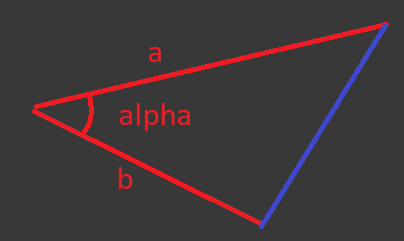

In [5]:
a = np.array([9,  3, 11])
b = np.array([ 8, 10,  10])

a_norm = np.linalg.norm(a)
b_norm = np.linalg.norm(b)
norm_product = a_norm * b_norm
cross_product = np.cross(a, b)
sin_thet = np.linalg.norm(cross_product)/norm_product
print(f"sin_thet: {sin_thet}")
S = 1/2 * a_norm * b_norm * sin_thet
print(f"res:{S}")

sin_thet: 0.4395041139166369
res:51.86520991955976


# Task_7

Лодка переплывает реку и имеет собственную скорость 10 $\frac{км}{ч}$.
Река имеет течение 5 $\frac{км}{ч}$. На сколько процентов у лодки наблюдается прирост скорости. Каков угол сноса? (Угол по отношению к нормали к скорости течения.)

In [26]:
v_river = 5
v_boat = 10

max_speed = np.sqrt(v_boat**2 + v_river**2)
speed_up_rate = (max_speed - v_boat)/v_boat * 100
print(f"speed_up_rate: {speed_up_rate}%")
cos_theta = v_boat / max_speed
print(f"degree:{np.arccos(cos_theta)}")

speed_up_rate: 11.80339887498949%
degree:0.46364760900080615


# Task_8

Пассажирский авиалайнер заходит на посадку с сильным боковым ветром. По приборам, самолет летит курсом 270 градусов со скоростью 140 узлов. Направление ветра 190 градусов и его скорость около 15 узлов. Каков курс захода на посадку?
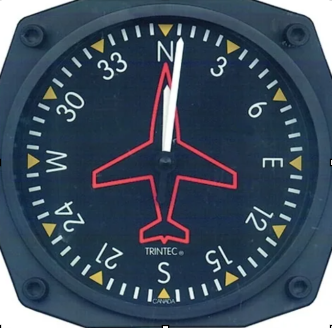

In [ ]:
air_plain__angle = 270
air_plain_speed = 140
wind__angle = 190
wind_speed = 15

relative_wind_angle = np.radians(wind__angle - air_plain__angle)
croswind = wind_speed * np.sin(relative_wind_angle)
drift_angle = np.degrees(np.arcsin(croswind / air_plain_speed))
true_course = air_plain__angle + drift_angle
true_course

print(f"relative_wind_angle: {relative_wind_angle}")
print(f"true_course: {true_course}")

relative_wind_angle: -1.3962634015954636
true_course: 263.9431545779333


# Task_9

Углы между векторами помогают показать сходства и различия между разными объектами в данных. Посмотрим это на примере автомобилей.

In [46]:
features = ['brand', 'prod_year', 'miliage', 'USD_prise'] # названия колонок
brand = ['Toyota', 'Lexus', 'Toyota', 'Lexus', 'Lexus', 'Toyota', 'Toyota', 'Toyota', 'Lexus', 'Toyota']
prod_year = [2019, 2020, 2010, 2007, 2012, 2015, 2021, 2022, 2019, 2001]
miliage = [30000, 35000, 120000, 200000, 130000, 110000, 45000, 10000, 42000, 340000]
USD_prise = [20000, 22000, 8000, 10000, 7000, 9000, 16000, 21000, 23000, 3000]
arr = np.array([brand, prod_year, miliage, USD_prise]).T
arr

array([['Toyota', '2019', '30000', '20000'],
       ['Lexus', '2020', '35000', '22000'],
       ['Toyota', '2010', '120000', '8000'],
       ['Lexus', '2007', '200000', '10000'],
       ['Lexus', '2012', '130000', '7000'],
       ['Toyota', '2015', '110000', '9000'],
       ['Toyota', '2021', '45000', '16000'],
       ['Toyota', '2022', '10000', '21000'],
       ['Lexus', '2019', '42000', '23000'],
       ['Toyota', '2001', '340000', '3000']], dtype='<U21')

Features:
* Брэнд - стоит заменить на 0 и 1
* Год выпуска
* Пробег в км
* Стоимсть в USD

Мы имеем дело с 4-х мерным признаковым пространством. Чем сильнее наблюдаются различия по признакам между двумя авто, тем больший угол будут иметь вектора, построенные на значениях признаков.

Выберем два похожих авто и рассчитаем угол и также сделаем для двух сильно непохожих.

Перед выполнением задачи полезно сделать масштабирование по формуле

$$x_{norm} = \frac{x}{x_{max}}$$

Подумайте, для чего мы делаем масштабирование?

# Task_11

На некоторое тело массой 2 кг действует система сил. Под действием данных сил тело движется с ускорением $\overrightarrow{a}$.

$$\displaystyle\sum_{i=1}^{n} \overrightarrow{F_i} = m\overrightarrow{a}$$

Дана начальная скорость и начальные координаты точки. При движении с ускорением каждая координата меняется по закону:

$$x(t) = x_0 + \upsilon_{0_x}t + \frac{a_xt^2}{2}$$

И аналогично и для других координат. Где:

* $x_0$ - Начальная координата
* $t$ - время в секундах
* $\upsilon_{0_x}$ - составляющая вектора скорости по оси OX
* $a_x$ - составляющая вектора ускорения по оси OX



```
x = []
y = []
z = []
```
Заполните текущие массивы всеми значениями координат для каждой секунды за первые 10 секунд движения. Запустите код визуализации траектории ниже. В коде уже прописано обращение к спискам x, y, z.


In [63]:
f_1 = np.array([3,5,-2])
f_2 = np.array([-1, 4, 3])
f_3 = np.array([0,-2,6])
f_4 = np.array([4, 0, -1])

Начальные скорость и координаты.

In [64]:
v_0 = np.array([-15, 0, 0])
x_0 = np.array([0, 0, 0])

In [69]:
x = [1, 2, 4]
y = [4, 3, 2]
z = [3, 2, 1]


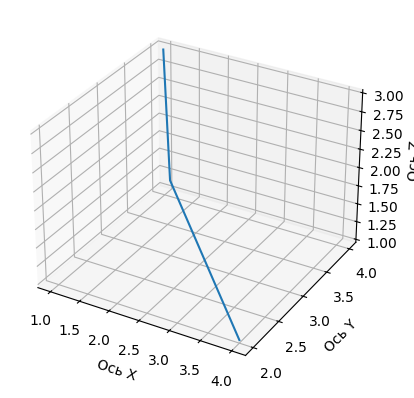

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_zlabel('Ось Z')
plt.show()
